In [1]:
from scipy import signal
# Ανατρέξτε στην τεκμηρίωση της βιβλιοθήκης scipy.signal
# https://docs.scipy.org/doc/scipy/reference/signal.html
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import warnings
warnings.filterwarnings('ignore')

### Μέρος 3:  Εφαρμογή Α
---

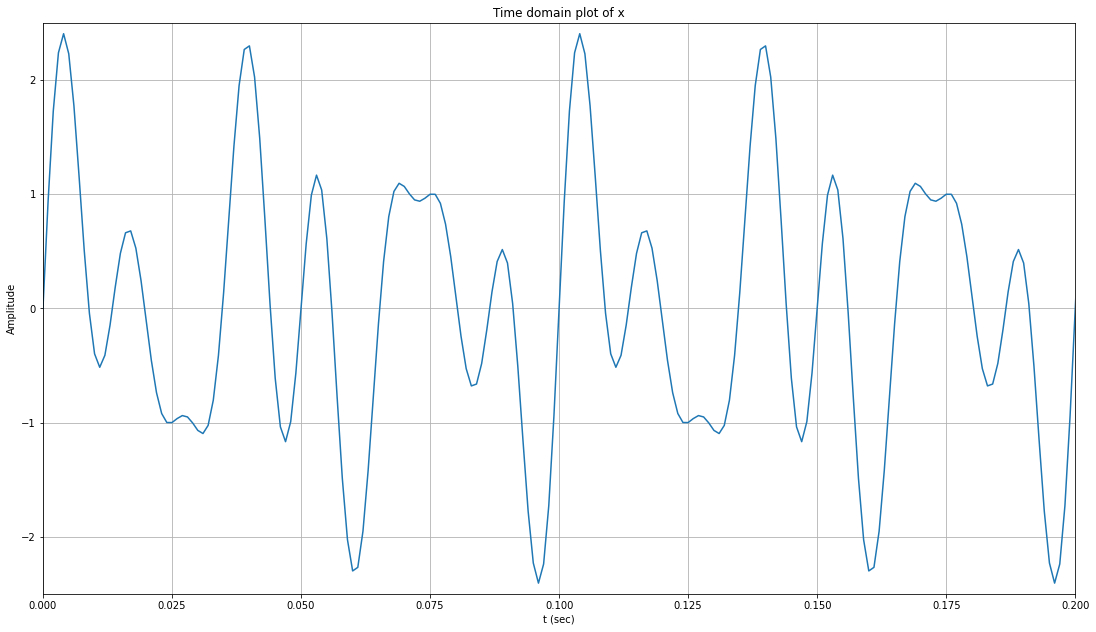

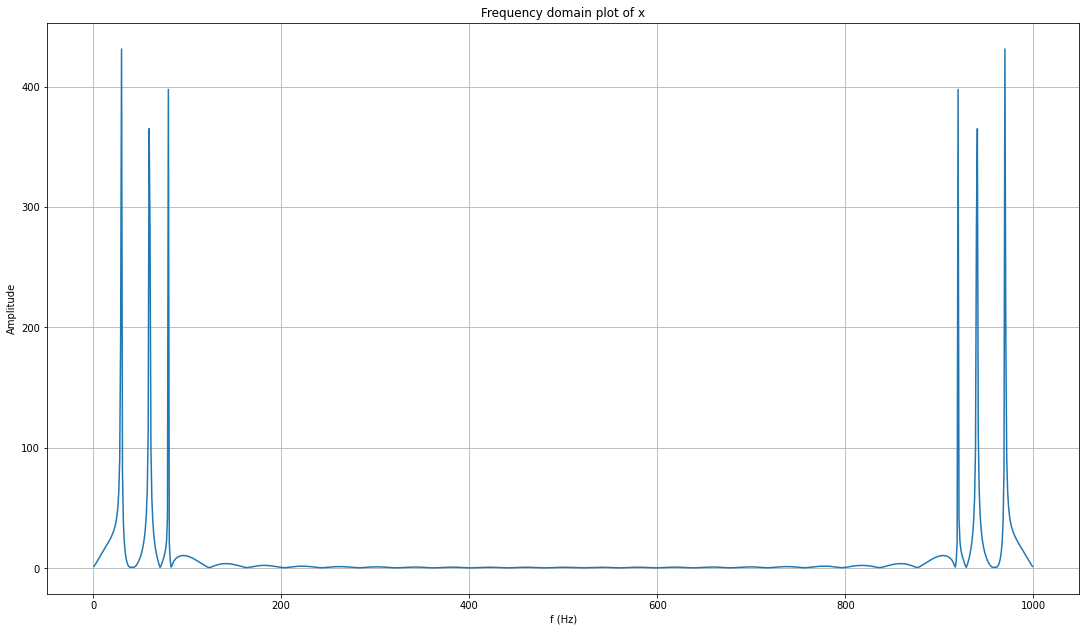

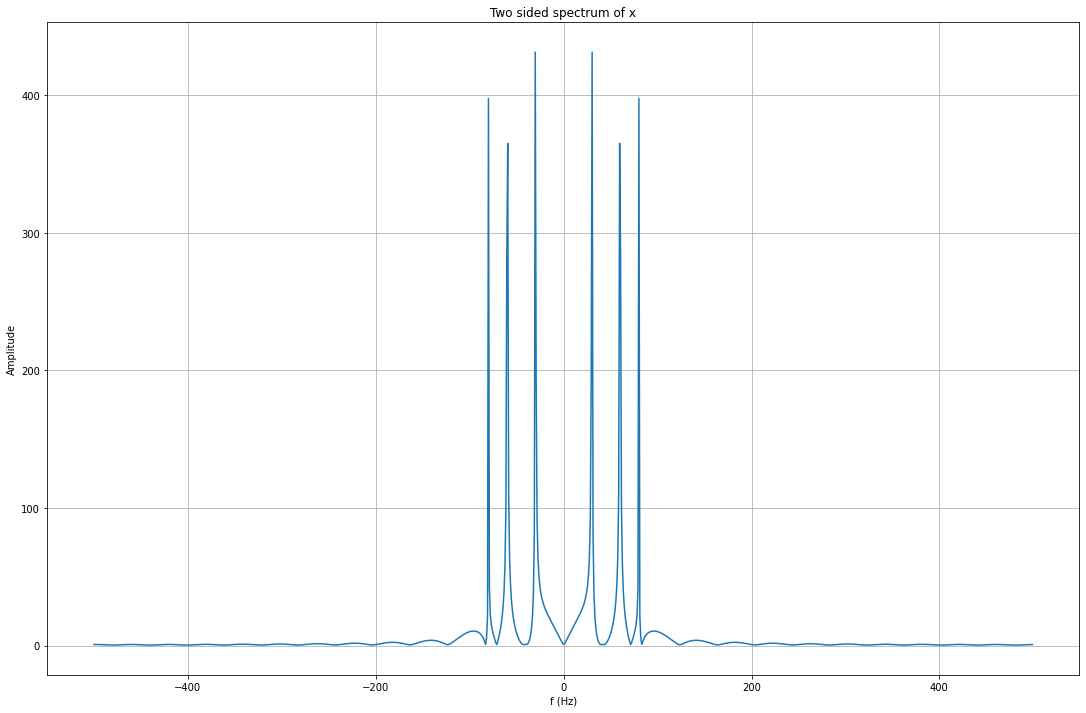

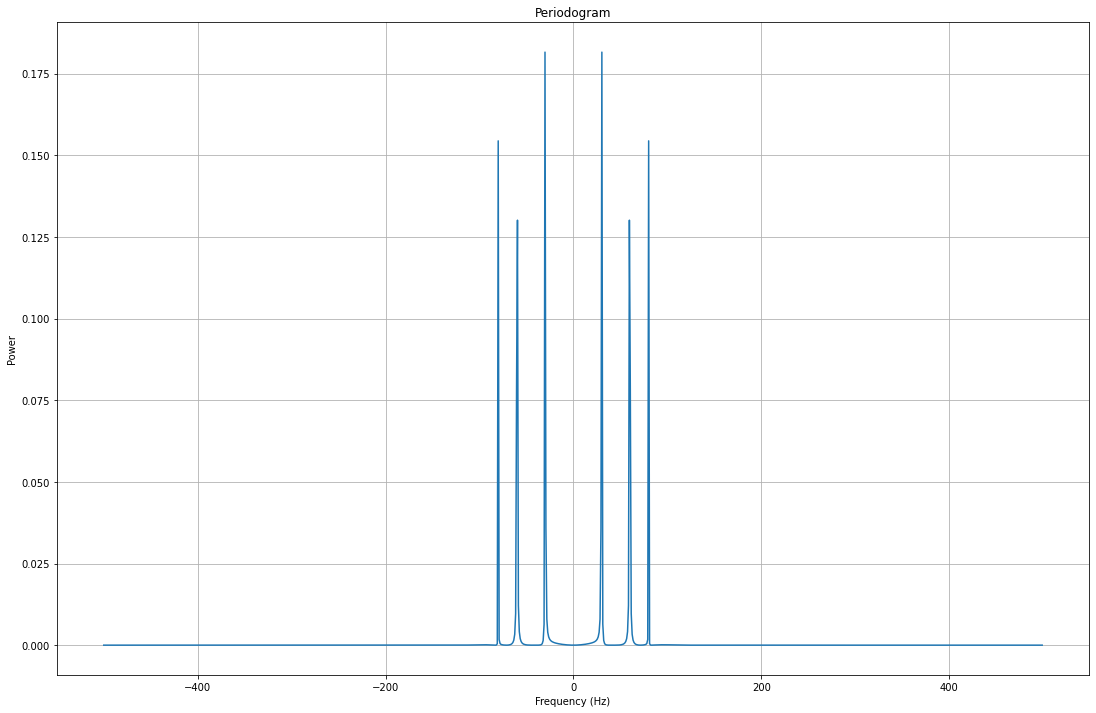

In [2]:
Fs = 1000  # συχνότητα δειγματοληψίας 1000 Hz
Ts = 1 / Fs  # περίοδος δειγματοληψίας
L = 1000  # μήκος σήματος (αριθμός δειγμάτων)
T = L * Ts  # διάρκεια σήματος
t = np.arange(0, (L - 1) * Ts, Ts)  # χρονικές στιγμές υπολογισμού του σήματος

x = np.sin(2 * np.pi * 30 * t) \
    + 0.8 * np.sin(2 * np.pi * 80 * (t - 2)) \
    + np.sin(2 * np.pi * 60 * t)  # συνιστώσα 60 Hz

# Σχεδιάστε το σήμα στο πεδίο του χρόνου

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(t, x)
ax.set(xlabel='t (sec)', ylabel='Amplitude',
       title='Time domain plot of x')
ax.grid()
ax.axis([0, 0.2, -2.5, 2.5])
plt.savefig('Time domain plot of x')
plt.show()


# Υπολογίστε τον διακριτό μετασχηματισμό Fourier

def nextpow2(i):  # επιστρέφει το n, τέτοιο ώστε 2^n >= L
    n = 0

    while 2 ** n < i:
        n += 1

    return n


N = 2 ** nextpow2(L)  # μήκος μετασχηματισμού Fourier.
# η nextpow2 βρίσκει τη δύναμη του 2 που
# είναι μεγαλύτερη ή ίση από το όρισμα L
Fo = Fs / N  # ανάλυση συχνότητας
f = np.arange(0, N) * Fo  # διάνυσμα συχνοτήτων
X = np.fft.fft(x, N)  # αριθμητικός υπολογισμός του διακριτού μετασχηματισμού Fourier (DFT) για Ν σημεία

# Σχεδιάστε το σήμα στο πεδίο συχνότητας

# Αφού το σήμα είναι πραγματικό μπορείτε να σχεδιάσετε μόνο τις θετικές συχνότητες
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f[np.arange(1, N)], abs(X[np.arange(1, N)]))
ax.set(xlabel='f (Hz)', ylabel='Amplitude',
       title='Frequency domain plot of x')
ax.grid()
plt.savefig('Frequency domain plot of x')
plt.show()

f = f - Fs / 2  # ολίσθηση συχνοτήτων προς τα αριστερά κατά –Fs/2
X = np.fft.fftshift(X)  # ολίσθηση της μηδενικής συχνότητας στο κέντρο του φάσματος
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 12)
ax.plot(f, abs(X))
ax.set(xlabel='f (Hz)', ylabel='Amplitude',
       title='Two sided spectrum of x')
ax.grid()
plt.savefig('Two sided spectrum of x')
plt.show()

# Υπολογίστε την ισχύ

power = np.multiply(X, np.conj(X)) / N / L  # υπολογισμός πυκνότητας ισχύος
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 12)
ax.plot(f, power)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='Periodogram')
ax.grid()
plt.savefig('Periodogram')
plt.show()

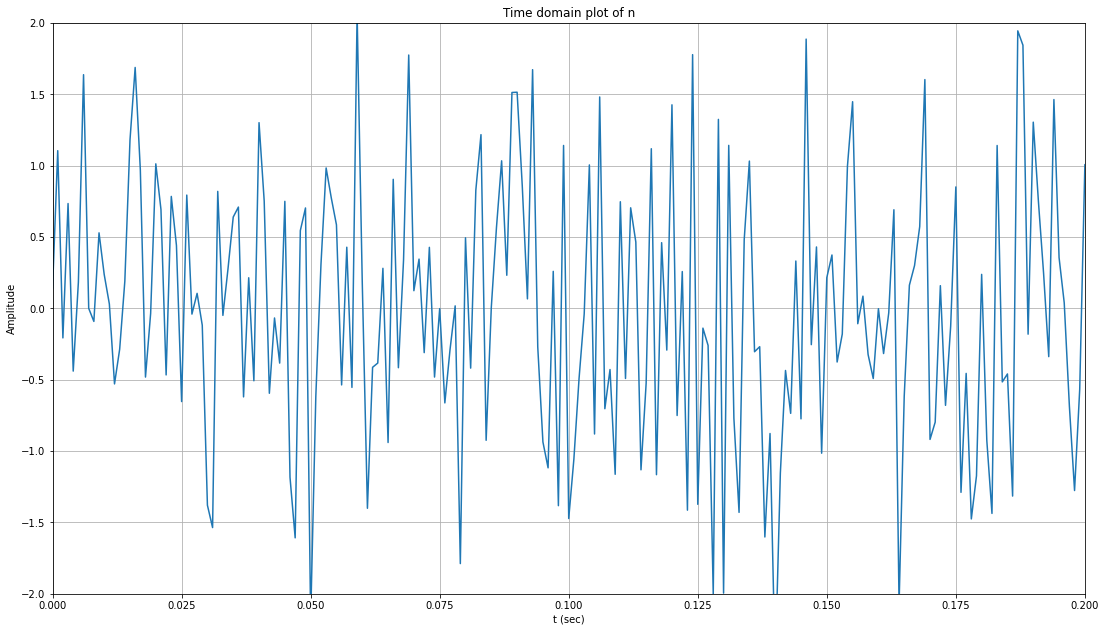

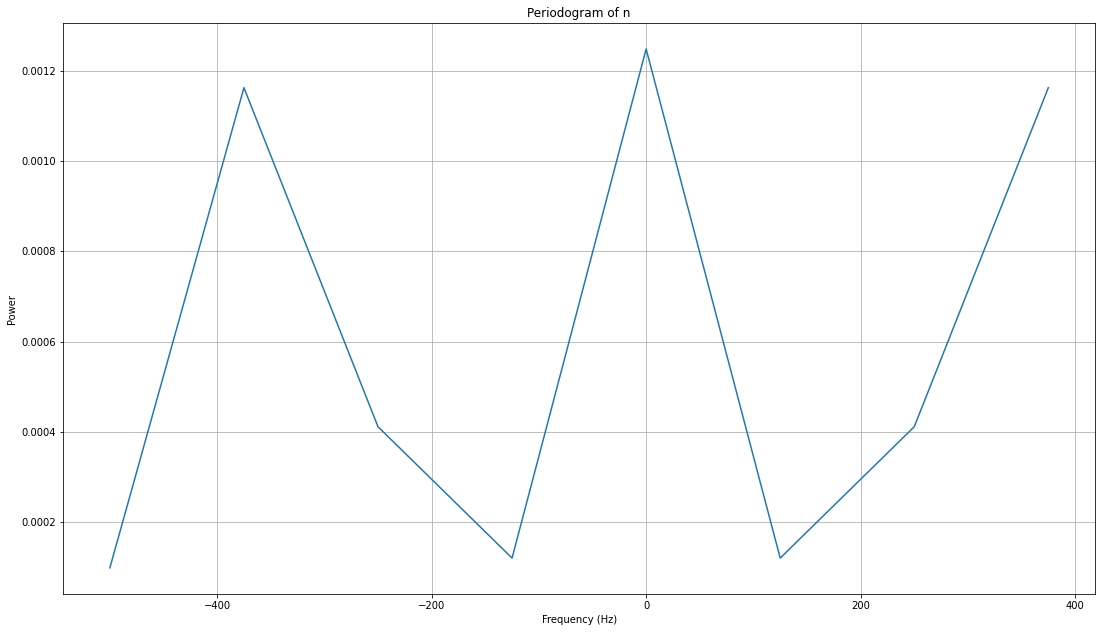

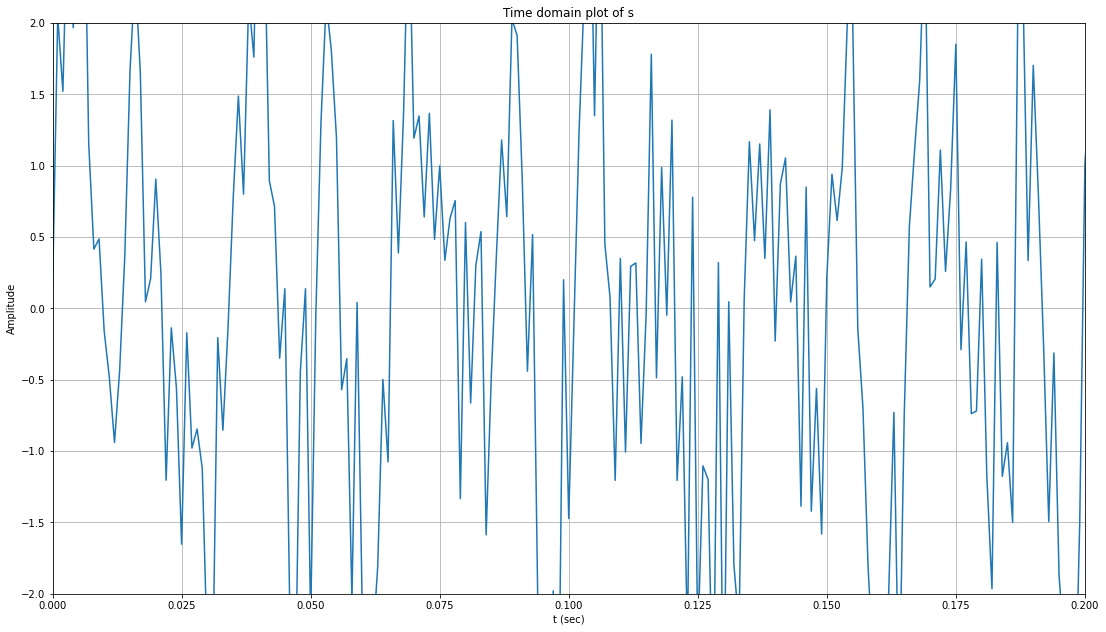

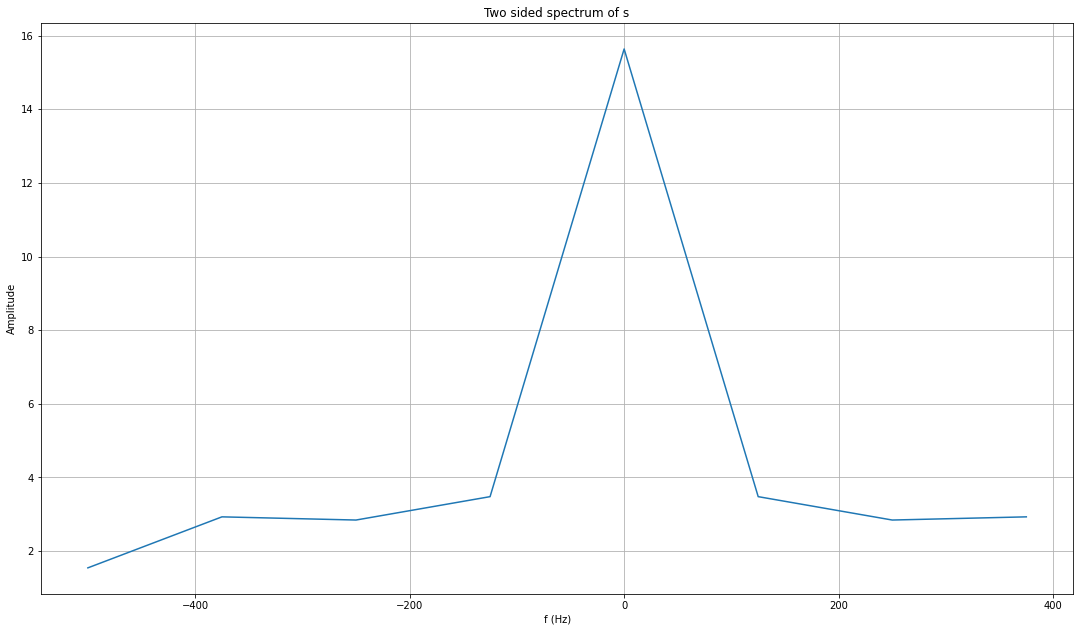

In [3]:
# Part 2 Προσθέστε θόρυβο στο σήμα

# Συμπληρώστε τον κώδικα για τη δημιουργία του σήματος θορύβου n με τη βοήθεια της συνάρτησης randn.
# Το διάνυσμα θορύβου n θα πρέπει να είναι του ίδιου μεγέθους με αυτό της ημιτονοειδούς κυματομορφής x του πρώτου μέρους.
# Σχεδιάστε το σήμα θορύβου στο διάστημα από 0 έως 0.2 sec και κλίμακα σε από -2 έως 2.
# Υπολογίστε το περιοδόγραμμα του n και σχεδιάστε την πυκνότητα φάσματος ισχύος του σήματος θορύβου.
# Προσθέστε το σήμα θορύβου και το x για να λάβετε το σήμα με θόρυβο s.
# Σχεδιάσατε το σήμα με θόρυβο s στο πεδίο του χρόνου στην περιοχή 0 έως 0.2 sec 
# και κλίμακα από -2 έως 2 καθώς και το αμφίπλευρο φάσμα του.

rand_n = random.randn(np.size(x))
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(t,rand_n)
ax.set(xlabel='t (sec)', ylabel='Amplitude',
       title='Time domain plot of n')
ax.axis([0, 0.2, -2, 2])
ax.grid()
plt.show()

N = 2^nextpow2(L)
Fo=Fs/N           
f=(np.arange(0,N))*Fo     
rand_N=np.fft.fft(rand_n,N)   
          
f=f-Fs/2
rand_N=np.fft.fftshift(rand_N)     

power_n=np.multiply(rand_N,np.conj(rand_N))/N/L
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f,power_n)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='Periodogram of n')
ax.grid()
plt.show()

s = x + rand_n

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(t,s)
ax.set(xlabel='t (sec)', ylabel='Amplitude',
       title='Time domain plot of s')
ax.axis([0, 0.2, -2, 2])
ax.grid()
plt.show()                  

N = 2^nextpow2(L)  
                   
Fo=Fs/N           
f=(np.arange(0,N))*Fo      
S=np.fft.fft(s,N)       
                             
f=f-Fs/2       
S=np.fft.fftshift(S)    
                  
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f,abs(S))
ax.set(xlabel='f (Hz)', ylabel='Amplitude',
       title='Two sided spectrum of s')
ax.grid()
plt.show()

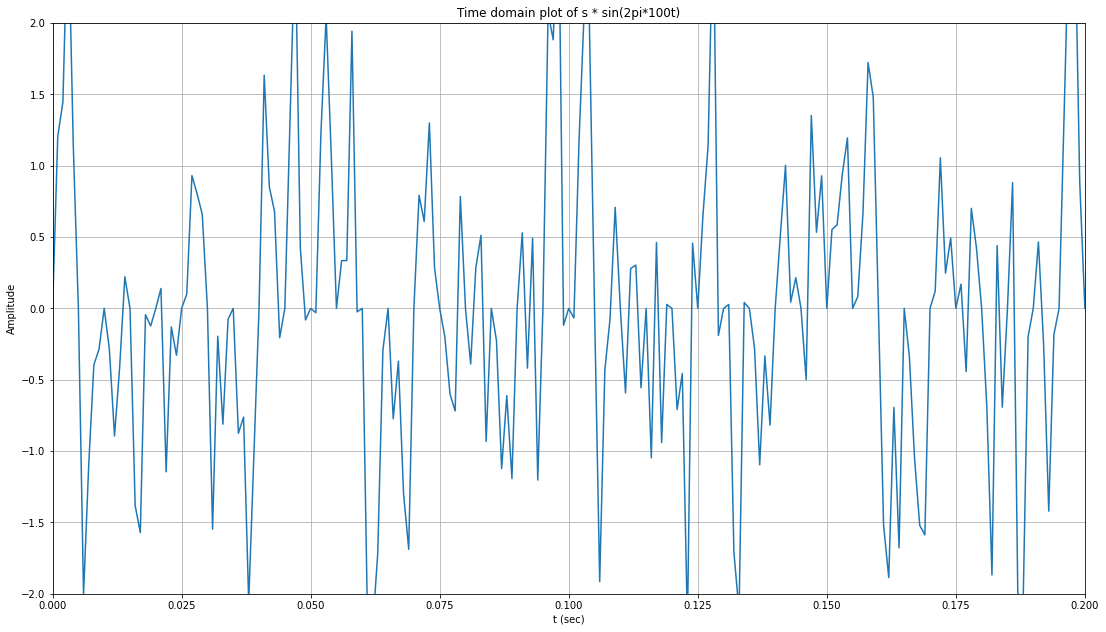

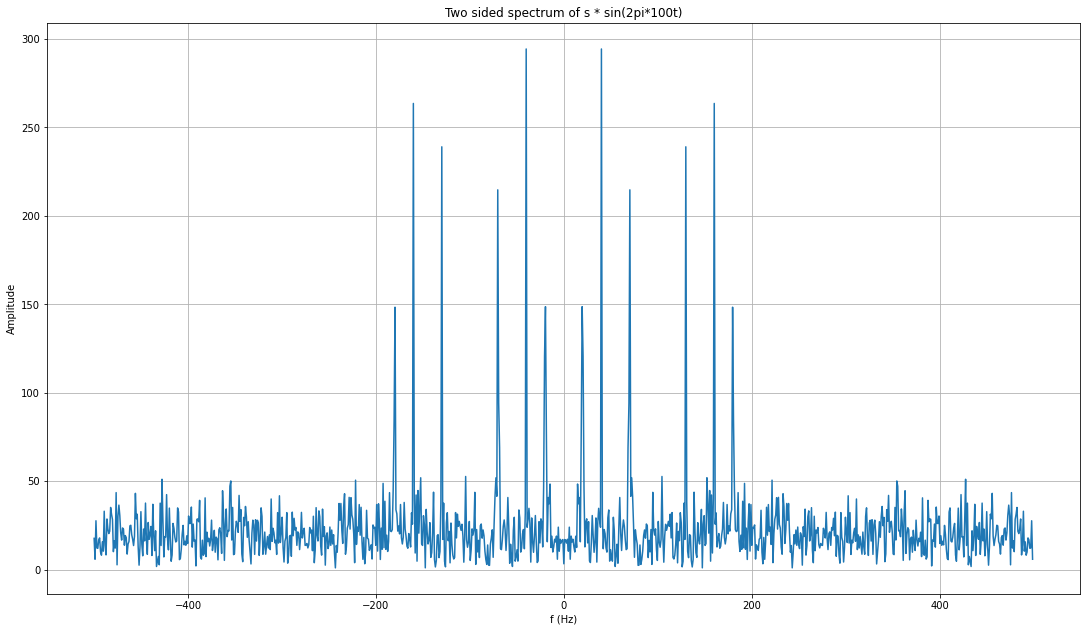

In [4]:
# Part 3. Πολλαπλασιασμός σημάτων

# Συμπληρώστε τον κώδικα δημιουργίας ενός ημιτονοειδούς σήματος συχνότητας
# 100 Hz και πολλαπλασιάστε με το προηγούμενο σήμα s.
# Τα δύο σήματα θα πρέπει να είναι του ίδιου μεγέθους.
# Σχεδιάστε το αποτέλεσμα στο πεδίο του χρόνου στην περιοχή 0 έως 0.2 sec
# και κλίμακα από -2 έως 2 καθώς και στο πεδίο της συχνότητας
# χρησιμοποιώντας τη συνάρτηση fftshift.


s_mul = np.sin(2 * np.pi * 100 * t)
s_final = s * s_mul

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(t, s_final)
ax.set(xlabel='t (sec)', ylabel='Amplitude',
       title='Time domain plot of s * sin(2pi*100t)')
ax.axis([0, 0.2, -2, 2])
ax.grid()
plt.savefig('Time domain plot of s * sin(2pi*100t)')
plt.show()

N = 2 ** nextpow2(L)

Fo = Fs / N
f = (np.arange(0, N)) * Fo
S_final = np.fft.fft(s_final, N)

f = f - Fs / 2
S_final = np.fft.fftshift(S_final)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f, abs(S_final))
ax.set(xlabel='f (Hz)', ylabel='Amplitude',
       title='Two sided spectrum of s * sin(2pi*100t)')
ax.grid()
plt.savefig('Two sided spectrum of s * sin(2pi*100t)')
plt.show()